In [2]:
set.seed(1413)
x <- c(78, 86, 97, 91, 83, 89, 92, 88, 79, 68)
x

[1] 78 86 97 91 83 89 92 88 79 68

In [5]:
library(boot)
my_mean <- function(x,i) { 
      mean(x[i], trim=0.2) 
}
boot(x, my_mean, R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = x, statistic = my_mean, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*       86  -0.166    2.776807

In [6]:
# 90% CI
boot.ci(boot(x, my_mean, R=1000), type="perc", conf=0.90)



BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot(x, my_mean, R = 1000), conf = 0.9, type = "perc")

Intervals : 
Level     Percentile     
90%   (81.01, 90.00 )  
Calculations and Intervals on Original Scale

In [ ]:
# if we know the data are from a normal distribution. How does this change the bootstrapping produce?
# if we know it's  a normal distribution, when we using bootstrap, we can use the normal distribution to calculate the CI

# we can use the t distribution to calculate the CI
# t distribution is more accurate than the normal distribution
# t distribution is more accurate when the sample size is small
# t distribution is more accurate when the population standard deviation is unknown

### Q3

In [8]:
# install.package("mlbench")
library(mlbench)
data("PimaIndiansDiabetes2", package = "mlbench")

mydata <- PimaIndiansDiabetes2

In [10]:
head(mydata)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,NA,33.6,0.627,50,pos
2,1,85,66,29,NA,26.6,0.351,31,neg
3,8,183,64,NA,NA,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,NA,NA,25.6,0.201,30,neg


In [11]:
y <- mydata$diabetes # y is the response variable
x <- mydata[, -9] # x is the predictor variables

In [15]:
# check if there is any NA value
any(is.na(mydata))
# remove NA values
mydata <- na.omit(mydata)
any(is.na(mydata))


[1] TRUE

[1] FALSE

In [17]:
y <- mydata$diabetes
x <- mydata[, -9]
mydata.glm <- glm(diabetes ~ ., data=mydata, family=binomial)
mydata.glm
cat("\nThe coefficient of the gml model:\n")
mydata.glm.coef <- coef(mydata.glm)
mydata.glm.coef


Call:  glm(formula = diabetes ~ ., family = binomial, data = mydata)

Coefficients:
(Intercept)     pregnant      glucose     pressure      triceps      insulin  
 -1.004e+01    8.216e-02    3.827e-02   -1.420e-03    1.122e-02   -8.253e-04  
       mass     pedigree          age  
  7.054e-02    1.141e+00    3.395e-02  

Degrees of Freedom: 391 Total (i.e. Null);  383 Residual
Null Deviance:	    498.1 
Residual Deviance: 344 	AIC: 362


The coefficient of the gml model:


(Intercept)      pregnant       glucose      pressure       triceps 
-1.004074e+01  8.215942e-02  3.826952e-02 -1.420290e-03  1.122139e-02 
      insulin          mass      pedigree           age 
-8.253128e-04  7.053758e-02  1.140909e+00  3.395162e-02

In [19]:
# interpre the coefficient for glucose. How does this effect the response variable?
# for every unit increase in glucose, the log odds of diabetes increases by 0.0382695223006247
coef(mydata.glm)[3]

glucose 
0.03826952

In [21]:
# which variable has the largest effect on the response variable?
# find the largest effect variables
# max(abs(coef(mydata.glm)))
summary(mydata.glm)




Call:
glm(formula = diabetes ~ ., family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7823  -0.6603  -0.3642   0.6409   2.5612  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.004e+01  1.218e+00  -8.246  < 2e-16 ***
pregnant     8.216e-02  5.543e-02   1.482  0.13825    
glucose      3.827e-02  5.768e-03   6.635 3.24e-11 ***
pressure    -1.420e-03  1.183e-02  -0.120  0.90446    
triceps      1.122e-02  1.708e-02   0.657  0.51128    
insulin     -8.253e-04  1.306e-03  -0.632  0.52757    
mass         7.054e-02  2.734e-02   2.580  0.00989 ** 
pedigree     1.141e+00  4.274e-01   2.669  0.00760 ** 
age          3.395e-02  1.838e-02   1.847  0.06474 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 344.02  on 383  degrees of freedom
AIC: 362.02

Numbe

In [22]:
# use step() to make backward selection
mydata.glm.step <- step(mydata.glm, direction="backward")
mydata.glm.step
summary(mydata.glm.step)

Start:  AIC=362.02
diabetes ~ pregnant + glucose + pressure + triceps + insulin + 
    mass + pedigree + age

           Df Deviance    AIC
- pressure  1   344.04 360.04
- insulin   1   344.42 360.42
- triceps   1   344.45 360.45
<none>          344.02 362.02
- pregnant  1   346.24 362.24
- age       1   347.55 363.55
- mass      1   350.89 366.89
- pedigree  1   351.58 367.58
- glucose   1   396.95 412.95

Step:  AIC=360.04
diabetes ~ pregnant + glucose + triceps + insulin + mass + pedigree + 
    age

           Df Deviance    AIC
- insulin   1   344.42 358.42
- triceps   1   344.46 358.46
<none>          344.04 360.04
- pregnant  1   346.24 360.24
- age       1   347.60 361.60
- mass      1   351.28 365.28
- pedigree  1   351.67 365.67
- glucose   1   397.31 411.31

Step:  AIC=358.42
diabetes ~ pregnant + glucose + triceps + mass + pedigree + age

           Df Deviance    AIC
- triceps   1   344.89 356.89
<none>          344.42 358.42
- pregnant  1   346.74 358.74
- age       1   3


Call:  glm(formula = diabetes ~ pregnant + glucose + mass + pedigree + 
    age, family = binomial, data = mydata)

Coefficients:
(Intercept)     pregnant      glucose         mass     pedigree          age  
   -9.99208      0.08395      0.03646      0.07814      1.15091      0.03436  

Degrees of Freedom: 391 Total (i.e. Null);  386 Residual
Null Deviance:	    498.1 
Residual Deviance: 344.9 	AIC: 356.9


Call:
glm(formula = diabetes ~ pregnant + glucose + mass + pedigree + 
    age, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8827  -0.6535  -0.3694   0.6521   2.5814  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.992080   1.086866  -9.193  < 2e-16 ***
pregnant     0.083953   0.055031   1.526 0.127117    
glucose      0.036458   0.004978   7.324 2.41e-13 ***
mass         0.078139   0.020605   3.792 0.000149 ***
pedigree     1.150913   0.424242   2.713 0.006670 ** 
age          0.034360   0.017810   1.929 0.053692 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 344.89  on 386  degrees of freedom
AIC: 356.89

Number of Fisher Scoring iterations: 5


In [ ]:
# compare Mallow's Cp for both model in glm and backward-select glm and choose the best model
# Mallow's Cp is the sum of the squared residuals plus 2 times the number of parameters
# the smaller the Cp, the better the model
# the smaller the Cp, the better the model
# the smaller the Cp, the better the model



In [24]:
# mydata.glm.step
# mydata.glm
Cp <- function(model) {
      return (sum(resid(model)^2) + 2*length(coef(model)))
}
Cp(mydata.glm.step)
Cp(mydata.glm)

[1] 356.8851

[1] 362.0212

In [26]:
library(leaps)
bwd <- regsubsets(y ~ ., data = mydata, nvmax = NULL, method = "backward")
as.data.frame(summary(bwd)$outmat)


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetespos
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1 ( 1 ),,,,,,,,,*
2 ( 1 ),,,,,,*,,,*
3 ( 1 ),,*,,,,*,,,*
4 ( 1 ),*,*,,,,*,,,*
5 ( 1 ),*,*,*,,,*,,,*
6 ( 1 ),*,*,*,,*,*,,,*
7 ( 1 ),*,*,*,*,*,*,,,*
8 ( 1 ),*,*,*,*,*,*,,*,*
9 ( 1 ),*,*,*,*,*,*,*,*,*


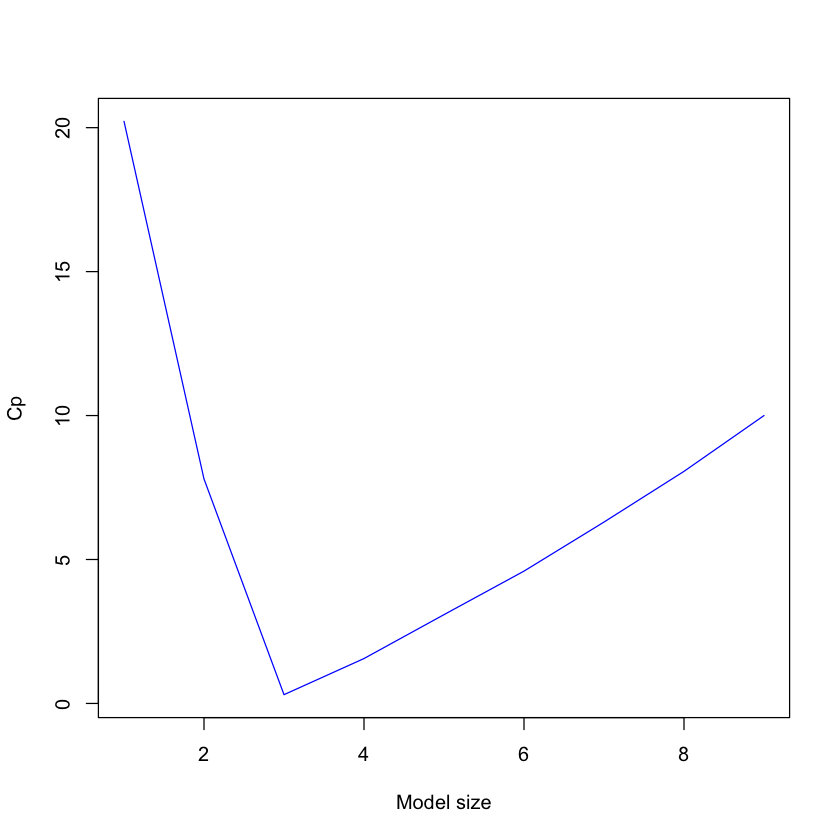

In [27]:
plot(summary(bwd)$cp, col = "blue", type = "l", xlab = "Model size", ylab = "Cp")

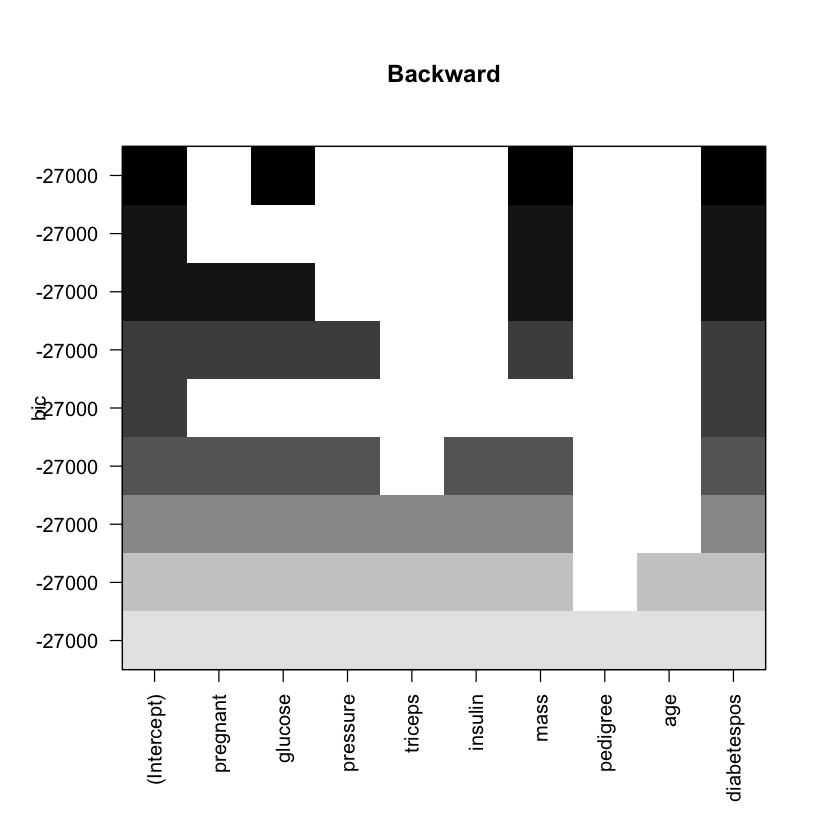

In [28]:
plot(bwd, main = "Backward")